In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [15]:
# 2. Dataset Source


# 3. Load Dataset
df = pd.read_csv('data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# 4. Data Preprocessing

In [19]:
print("Initial Info:")
print(df.info())

Initial Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [21]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [23]:
print("\nData Description:\n", df.describe(include='all'))


Data Description:
         PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.0

In [25]:
print("\nShape of dataset:", df.shape)


Shape of dataset: (418, 12)


In [29]:
# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'] = df['Cabin'].fillna('Missing')

C:\Users\hp\AppData\Local\Temp\ipykernel_6784\88327005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_6784\88327005.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [31]:
# 5. Data Formatting and Normalization (Continued)
df['Survived'] = df['Survived'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [34]:
# Normalize numerical features like Age and Fare
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [37]:
# 6. Convert Categorical Variables into Quantitative Variables
# Label encoding for 'Embarked' and 'Survived'
labelencoder = LabelEncoder()
df['Embarked_Label'] = labelencoder.fit_transform(df['Embarked'])
df['Survived_Label'] = labelencoder.fit_transform(df['Survived'])

# One-Hot Encoding for 'Sex' and 'Pclass'
df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)], axis=1)

# Drop original categorical columns that are now encoded
df.drop(['Sex', 'Pclass', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

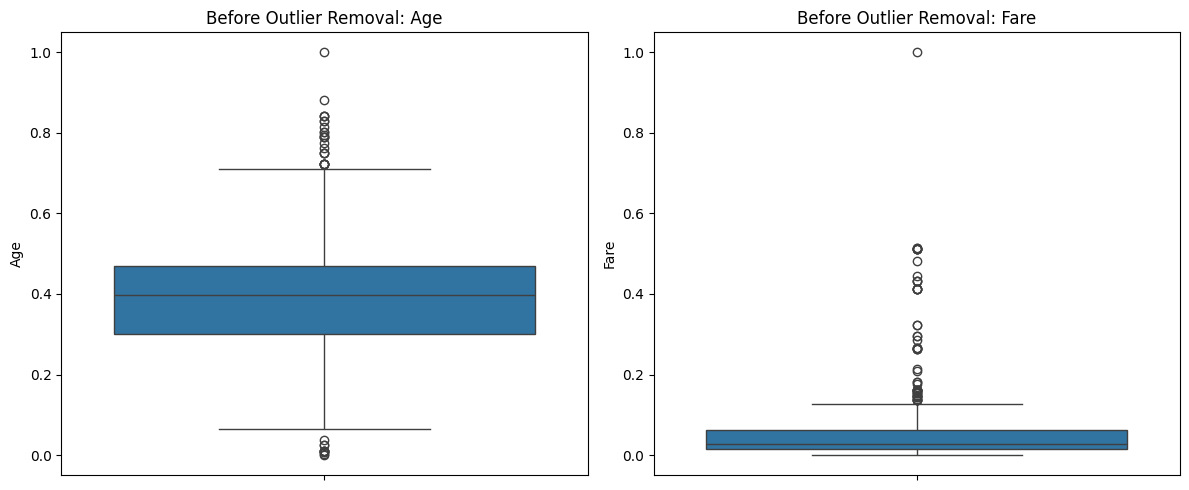

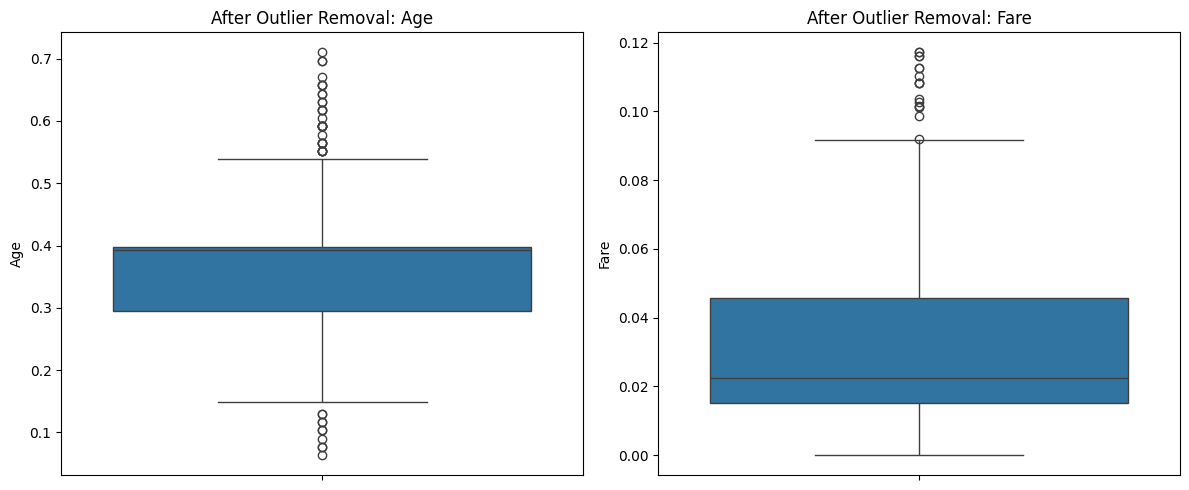

In [39]:
# 7. Outlier Detection and Removal using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Plotting boxplots for Age and Fare before outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Before Outlier Removal: Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title("Before Outlier Removal: Fare")
plt.tight_layout()
plt.show()

# Remove outliers from Age and Fare using IQR method
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

# Plotting boxplots for Age and Fare after outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("After Outlier Removal: Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title("After Outlier Removal: Fare")
plt.tight_layout()
plt.show()

In [43]:
# 8. Final Data Summary
print("\nCleaned Data Info:")
print(df.info())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 417
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     333 non-null    int64   
 1   Survived        333 non-null    category
 2   Age             333 non-null    float64 
 3   SibSp           333 non-null    int64   
 4   Parch           333 non-null    int64   
 5   Fare            333 non-null    float64 
 6   Embarked_Label  333 non-null    int32   
 7   Survived_Label  333 non-null    int64   
 8   Sex_male        333 non-null    bool    
 9   Pclass_2        333 non-null    bool    
 10  Pclass_3        333 non-null    bool    
dtypes: bool(3), category(1), float64(2), int32(1), int64(4)
memory usage: 20.9 KB
None


In [45]:
print("\nCleaned Data Description:")
print(df.describe())


Cleaned Data Description:
       PassengerId         Age       SibSp       Parch        Fare  \
count   333.000000  333.000000  333.000000  333.000000  333.000000   
mean   1095.636637    0.373643    0.351351    0.261261    0.032981   
std     119.723087    0.116489    0.744239    0.720338    0.025032   
min     892.000000    0.063695    0.000000    0.000000    0.000000   
25%     994.000000    0.294474    0.000000    0.000000    0.015216   
50%    1091.000000    0.393380    0.000000    0.000000    0.022447   
75%    1196.000000    0.396975    1.000000    0.000000    0.045771   
max    1309.000000    0.709877    5.000000    6.000000    0.117112   

       Embarked_Label  Survived_Label  
count       333.00000      333.000000  
mean          1.48048        0.321321  
std           0.80121        0.467687  
min           0.00000        0.000000  
25%           1.00000        0.000000  
50%           2.00000        0.000000  
75%           2.00000        1.000000  
max           2.00000 

In [47]:
print("\nCleaned Data Shape:", df.shape)


Cleaned Data Shape: (333, 11)


In [49]:
df.isnull().sum()

PassengerId       0
Survived          0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked_Label    0
Survived_Label    0
Sex_male          0
Pclass_2          0
Pclass_3          0
dtype: int64